In [1]:
import pandas as pd
import os
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('IR-assignment-2-data.txt', sep=" ", header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239912,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:0,129:2,130:59949,131:22708,132:5,133:6,134:0,135:391,136:28.2671136253899,NaN
239913,0,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,128:794,129:1,130:11922,131:5916,132:10,133:37,134:0,135:0,136:0,NaN
239914,0,qid:4,1:1,2:0,3:1,4:0,5:1,6:0.333333,7:0,8:0.333333,...,128:0,129:3,130:24551,131:21182,132:14,133:26,134:0,135:685,136:35.5906043006439,NaN
239915,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,NaN


In [3]:
groupedByqid = data.groupby([1])
requiredDf = groupedByqid.get_group('qid:4')
requiredDf = requiredDf.drop([138], axis=1)
requiredDf

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239912,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,127:19,128:0,129:2,130:59949,131:22708,132:5,133:6,134:0,135:391,136:28.2671136253899
239913,0,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,127:25,128:794,129:1,130:11922,131:5916,132:10,133:37,134:0,135:0,136:0
239914,0,qid:4,1:1,2:0,3:1,4:0,5:1,6:0.333333,7:0,8:0.333333,...,127:21,128:0,129:3,130:24551,131:21182,132:14,133:26,134:0,135:685,136:35.5906043006439
239915,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:62,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0


In [4]:
requiredDf[0]

0         0
1         0
2         0
3         0
4         1
         ..
239912    0
239913    0
239914    0
239915    0
239916    0
Name: 0, Length: 927, dtype: int64

In [5]:
arrangedByMaxDCG_df = requiredDf.sort_values(by=[0], ascending=False)
arrangedByMaxDCG_df

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
239814,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
239402,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
239299,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
239196,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
239093,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239388,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:50,128:1,129:4,130:144,131:6017,132:2,133:22,134:0,135:0,136:0
239389,0,qid:4,1:2,2:0,3:2,4:2,5:2,6:0.666667,7:0,8:0.666667,...,127:45,128:2,129:0,130:1658,131:6464,132:10,133:44,134:0,135:0,136:0
239390,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:53,128:7,129:5,130:783,131:9067,132:20,133:16,134:0,135:0,136:0
239391,0,qid:4,1:1,2:0,3:0,4:0,5:1,6:0.333333,7:0,8:0,...,127:20,128:0,129:2,130:18637,131:11377,132:12,133:110,134:0,135:122,136:29.542582010582


In [6]:
requiredDf

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239912,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,127:19,128:0,129:2,130:59949,131:22708,132:5,133:6,134:0,135:391,136:28.2671136253899
239913,0,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,127:25,128:794,129:1,130:11922,131:5916,132:10,133:37,134:0,135:0,136:0
239914,0,qid:4,1:1,2:0,3:1,4:0,5:1,6:0.333333,7:0,8:0.333333,...,127:21,128:0,129:3,130:24551,131:21182,132:14,133:26,134:0,135:685,136:35.5906043006439
239915,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:62,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0


In [7]:
with open('output.txt', 'a') as file:
    dftoTxt = arrangedByMaxDCG_df.to_string(header=False, index=False)
    file.write(dftoTxt)

In [8]:
groupedByrelevance_score = requiredDf.groupby([0]).size()
groupedByrelevance_score

0
0    531
1    234
2    153
3      9
dtype: int64

In [9]:
type(groupedByrelevance_score)

pandas.core.series.Series

In [10]:
number_of_files = 1
for val in groupedByrelevance_score:
    number_of_files = number_of_files * math.factorial(val)

In [11]:
number_of_files

2478271939598739897886873231623975974038071987026617640150796213654621832893405444304126548828910460588755501295381010640847538240848824392782595804818000242425113230008354552604503701177383861002370552015339309672295940129240281527393005608676302022127338670215503123586174164883133441692328213679706360439030779285023981500130700684626798814107946675729718203650870945416175792610347292777485354023284149532649455066215955189499768494029906401417687079125337400699392549272379899317049963236905155789116021341009860073214560619580736162273021642142135323456288767999528285234858044273167247702466332649976120172480961921882667197156839190370792233499090846031594086967221054692838318357286546684196189710536545514618982121952406762254585153163148231938532280924632278717061874399915958443747785060721081215545865586638554825001793195275329971426065072860797443399846974074571885603791203095692141783767015057811964134335938085564030689895255520697661813418729679696807163570134190574371039194233111

In [12]:
Ideal_DCG = 0

for i, rel_score in enumerate(arrangedByMaxDCG_df[0]):
    print(i,' ',rel_score,'\n')
    Ideal_DCG = Ideal_DCG + ((2**rel_score)-1)/math.log(i+2, 2)

0   3 

1   3 

2   3 

3   3 

4   3 

5   3 

6   3 

7   3 

8   3 

9   2 

10   2 

11   2 

12   2 

13   2 

14   2 

15   2 

16   2 

17   2 

18   2 

19   2 

20   2 

21   2 

22   2 

23   2 

24   2 

25   2 

26   2 

27   2 

28   2 

29   2 

30   2 

31   2 

32   2 

33   2 

34   2 

35   2 

36   2 

37   2 

38   2 

39   2 

40   2 

41   2 

42   2 

43   2 

44   2 

45   2 

46   2 

47   2 

48   2 

49   2 

50   2 

51   2 

52   2 

53   2 

54   2 

55   2 

56   2 

57   2 

58   2 

59   2 

60   2 

61   2 

62   2 

63   2 

64   2 

65   2 

66   2 

67   2 

68   2 

69   2 

70   2 

71   2 

72   2 

73   2 

74   2 

75   2 

76   2 

77   2 

78   2 

79   2 

80   2 

81   2 

82   2 

83   2 

84   2 

85   2 

86   2 

87   2 

88   2 

89   2 

90   2 

91   2 

92   2 

93   2 

94   2 

95   2 

96   2 

97   2 

98   2 

99   2 

100   2 

101   2 

102   2 

103   2 

104   2 

105   2 

106   2 

107   2 

108   2 

109   2 

110   2 



In [13]:
Ideal_DCG

135.2809485769149

## NDCG at 50

In [14]:
relevance_score_50 = requiredDf[0].iloc[0:50]
print(relevance_score_50)

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     3
8     0
9     0
10    1
11    0
12    0
13    1
14    0
15    0
16    0
17    1
18    2
19    2
20    1
21    2
22    2
23    0
24    1
25    2
26    0
27    0
28    0
29    1
30    0
31    0
32    1
33    0
34    2
35    0
36    2
37    2
38    1
39    0
40    2
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: 0, dtype: int64


In [15]:
relevance_score_50_sorted = list(relevance_score_50.sort_values(ascending= False))
print(relevance_score_50_sorted)

[3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
IDCG_50 = 0

for i, rel_score in enumerate(relevance_score_50_sorted):
    IDCG_50 = IDCG_50 + ((2**rel_score)-1)/math.log(i+2, 2)
print(IDCG_50)

20.1273870581002


In [17]:
DCG_50 = 0

for i, rel_score in enumerate(relevance_score_50):
    DCG_50 = DCG_50 + ((2**rel_score)-1)/math.log(i+2, 2)
print(DCG_50)

10.323516383590077


In [18]:
NDCG_50 = DCG_50/IDCG_50
print(NDCG_50)

0.5129089212519223


In [19]:
DCG_fulldoc = 0

for i, rel_score in enumerate(requiredDf[0]):
    DCG_fulldoc = DCG_fulldoc + ((2**rel_score)-1)/math.log(i+2, 2)
print(DCG_fulldoc)

95.15592378302807


In [20]:
NDCG_fulldoc = DCG_fulldoc/Ideal_DCG
print(NDCG_fulldoc)

0.7033948592467661


In [21]:
print(list(requiredDf[76]))

['75:90.53171', '75:538.388954', '75:88.171761', '75:144.564444', '75:142.589323', '75:463.099129', '75:103.400313', '75:411.010633', '75:972.826451', '75:142.589323', '75:84.625987', '75:91.160998', '75:180.720002', '75:237.21632', '75:22.480108', '75:84.625987', '75:14.972391', '75:42.227139', '75:81.947653', '75:157.05992', '75:84.625987', '75:143.445062', '75:166.683125', '75:70.466293', '75:121.96152', '75:69.811973', '75:74.434086', '75:186.375414', '75:79.630746', '75:176.875026', '75:19.313312', '75:187.934366', '75:94.958714', '75:121.007996', '75:89.877389', '75:85.634253', '75:217.848266', '75:156.301965', '75:200.840161', '75:201.720933', '75:192.953467', '75:212.401296', '75:169.844071', '75:148.415271', '75:148.415271', '75:91.717534', '75:143.769297', '75:71.646268', '75:185.617459', '75:3.539923', '75:176.000104', '75:76.360315', '75:237.21632', '75:202.442155', '75:305.102064', '75:188.936782', '75:571.500533', '75:68.100494', '75:142.038637', '75:188.129935', '75:439.

In [22]:
def extract_feature_values(x):
    return x.split(':')[1]

requiredDf[76] = requiredDf[76].apply(extract_feature_values)


In [23]:
requiredDf[76].unique()

array(['90.53171', '538.388954', '88.171761', '144.564444', '142.589323',
       '463.099129', '103.400313', '411.010633', '972.826451',
       '84.625987', '91.160998', '180.720002', '237.21632', '22.480108',
       '14.972391', '42.227139', '81.947653', '157.05992', '143.445062',
       '166.683125', '70.466293', '121.96152', '69.811973', '74.434086',
       '186.375414', '79.630746', '176.875026', '19.313312', '187.934366',
       '94.958714', '121.007996', '89.877389', '85.634253', '217.848266',
       '156.301965', '200.840161', '201.720933', '192.953467',
       '212.401296', '169.844071', '148.415271', '91.717534',
       '143.769297', '71.646268', '185.617459', '3.539923', '176.000104',
       '76.360315', '202.442155', '305.102064', '188.936782',
       '571.500533', '68.100494', '142.038637', '188.129935',
       '439.396463', '161.455583', '161.15638', '98.418404', '43.297629',
       '226.444023', '77.167163', '612.893205', '121.814843', '95.257458',
       '18.133337', '19

In [24]:
requiredDf[76].astype(float)

0          90.531710
1         538.388954
2          88.171761
3         144.564444
4         142.589323
             ...    
239912     15.773388
239913    161.455583
239914     22.419515
239915     70.460443
239916     84.625987
Name: 76, Length: 927, dtype: float64

In [25]:
df = pd.DataFrame(columns=['Actual_Rel_score', 'Feature_75'])



In [26]:
df.Actual_Rel_score = requiredDf[0]

In [27]:
df.Feature_75 = requiredDf[76].astype(float)

In [28]:
df

,Actual_Rel_score,Feature_75
0,0,90.531710
1,0,538.388954
2,0,88.171761
3,0,144.564444
4,1,142.589323
...,...,...
239912,0,15.773388
239913,0,161.455583
239914,0,22.419515
239915,0,70.460443


In [29]:
df.Actual_Rel_score = df.Actual_Rel_score/max(df.Actual_Rel_score)
maxi = max(df.Feature_75)
mini = min(df.Feature_75)

df.Feature_75 = (df.Feature_75 - mini)/(maxi-mini)

#df = df.sort_values(by=['Feature_75'], ascending=False)
df

,Actual_Rel_score,Feature_75
0,0.000000,0.089748
1,0.000000,0.551797
2,0.000000,0.087314
3,0.000000,0.145493
4,0.333333,0.143455
...,...,...
239912,0.000000,0.012621
239913,0.000000,0.162919
239914,0.000000,0.019478
239915,0.000000,0.069041


Text(0, 0.5, 'Precision')

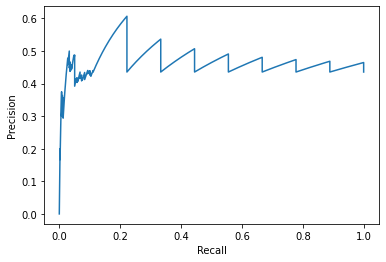

In [30]:
# for plotting Precision-Recall Curve

docs_retr = 0 

retr_rel_doc = 0

number_of_relevant_doc = np.count_nonzero(df.Actual_Rel_score)

recall_values = [] # to store recall values

precision_values = [] # to store precision values

for pos, row in df.iterrows():
    if (row['Feature_75'] > 0):
        docs_retr += 1  # counting the retrieved docs
    if (row['Actual_Rel_score'] > 0) and (row['Feature_75'] > 0):
        retr_rel_doc += 1 # counting the  retrieved docs which are relevant
    
    recall_values.append(retr_rel_doc/number_of_relevant_doc)
    precision_values.append(retr_rel_doc/docs_retr)

plt.plot(recall_values, precision_values)
plt.xlabel('Recall')
plt.ylabel('Precision')